In [32]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd

ruta = '/content/drive/MyDrive/Copia de bd final.xlsx'


df = pd.read_excel(ruta, engine='openpyxl')

df.head()


,NUMERO_DEPOSITO,DESCRIPCION,ORDEN_COMPRA,FECHA_ORDEN_COMPRA,CODIGO_RUBRO,RUBRO,CODIGO_ARTICULO,CODIGO_ART_PROVEEDOR,ARTICULO,UNIDAD_MEDIDA,...,ESTADO,NÚMERO SC,FECHA SC,FECHA OBJETIVO SC,OBSERVACIONES SC,ESTADO SC,CÓDIGO DUN 14,FECHA VALORIZACIÓN,FECHA APROBACIÓN TÉCNICA,FECHA APROBACIÓN GERENCIAL
0,17,INSUMOS,116230,2024-01-02,550300.0,TAPA VINAGRE,919567,919567,TAPA PILFER 31.5 X 24 NEGRA INS.6 A,UN,...,CO,NaN,NaT,NaN,NaN,NaN,919567,NaT,NaT,NaT
1,99,PORTA,116247,2024-01-02,880000.0,CONCEPTOS VARIOS,910284,2106,CUOTA SOCIAL,UN,...,CO,NaN,NaT,NaN,NaN,NaN,910284,NaT,NaT,NaT
2,99,PORTA,116244,2024-01-02,880000.0,CONCEPTOS VARIOS,910284,2456,CUOTA SOCIAL,UN,...,CO,NaN,NaT,NaN,NaN,NaN,910284,NaT,NaT,NaT
3,99,PORTA,116222,2024-01-02,600000.0,TRANSPORTE,922873,922873,REPUESTOS CAMIONES,UN,...,CO,NaN,NaT,NaN,NaN,NaN,922873,NaT,NaT,NaT
4,99,PORTA,116221,2024-01-02,406011.0,Inoxidable,916400,RI221106373,"CHAPA,MAT.ACERO INOXIDABLE, AISI 430, 1000 X 2...",UN,...,CO,3997.0,2023-11-14,2023-11-17 00:00:00,NaN,RECIBIDA TOTAL,916400,2023-12-27,2023-12-28,2023-12-28


# Análisis de Órdenes de Compra
Este notebook corresponde a la primera preentrega del trabajo final del curso de Data Science. Se analiza un dataset de órdenes de compra con el objetivo de identificar patrones relevantes para la toma de decisiones estratégicas.

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Excel
df = pd.read_excel(ruta, engine='openpyxl')

# Mostrar las primeras filas
df.head()

,NUMERO_DEPOSITO,DESCRIPCION,ORDEN_COMPRA,FECHA_ORDEN_COMPRA,CODIGO_RUBRO,RUBRO,CODIGO_ARTICULO,CODIGO_ART_PROVEEDOR,ARTICULO,UNIDAD_MEDIDA,...,ESTADO,NÚMERO SC,FECHA SC,FECHA OBJETIVO SC,OBSERVACIONES SC,ESTADO SC,CÓDIGO DUN 14,FECHA VALORIZACIÓN,FECHA APROBACIÓN TÉCNICA,FECHA APROBACIÓN GERENCIAL
0,17,INSUMOS,116230,2024-01-02,550300.0,TAPA VINAGRE,919567,919567,TAPA PILFER 31.5 X 24 NEGRA INS.6 A,UN,...,CO,NaN,NaT,NaN,NaN,NaN,919567,NaT,NaT,NaT
1,99,PORTA,116247,2024-01-02,880000.0,CONCEPTOS VARIOS,910284,2106,CUOTA SOCIAL,UN,...,CO,NaN,NaT,NaN,NaN,NaN,910284,NaT,NaT,NaT
2,99,PORTA,116244,2024-01-02,880000.0,CONCEPTOS VARIOS,910284,2456,CUOTA SOCIAL,UN,...,CO,NaN,NaT,NaN,NaN,NaN,910284,NaT,NaT,NaT
3,99,PORTA,116222,2024-01-02,600000.0,TRANSPORTE,922873,922873,REPUESTOS CAMIONES,UN,...,CO,NaN,NaT,NaN,NaN,NaN,922873,NaT,NaT,NaT
4,99,PORTA,116221,2024-01-02,406011.0,Inoxidable,916400,RI221106373,"CHAPA,MAT.ACERO INOXIDABLE, AISI 430, 1000 X 2...",UN,...,CO,3997.0,2023-11-14,2023-11-17 00:00:00,NaN,RECIBIDA TOTAL,916400,2023-12-27,2023-12-28,2023-12-28


In [39]:

import os
print(os.getcwd())


/content


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preguntas e hipótesis de interés
1. ¿Qué proveedores tienen mayor cantidad de órdenes de compra?
2. ¿Qué proveedores concentran el mayor monto total de compras?
3. ¿Existe relación entre la cantidad de órdenes y el monto total por proveedor?

**Hipótesis:** Los proveedores con mayor cantidad de órdenes también concentran el mayor volumen económico, lo que los convierte en candidatos ideales para acuerdos marco.

In [51]:
# Agrupar por proveedor y calcular cantidad de órdenes y monto total
df_grouped = df.groupby('RAZON_SOCIAL').agg(
    Cantidad_OC=('ORDEN_COMPRA', 'nunique'),
    Monto_Total=('SUBTOTAL_POR_ITEM', 'sum')
).reset_index()

# Ordenar por cantidad de órdenes
df_grouped = df_grouped.sort_values(by='Cantidad_OC', ascending=False)
df_grouped.head(10)

,RAZON_SOCIAL,Cantidad_OC,Monto_Total
522,GRASSI S.A. (COMISIONES),324,3.823604e+07
601,INTELMEC INGENIERIA SA,187,1.290065e+09
941,RIVAROSA SOCIEDAD ANONIMA,118,1.821163e+07
38,AGUIRRE ROBERTO MARTIN,111,3.905283e+06
747,MAZZARELLA ALBERTO BENJAMIN,100,5.306223e+07
938,RICHETTA Y CIA. S.A.,97,2.470001e+05
73,AMIANGRAF S.R.L.,84,1.780363e+05
288,CONTRERAS SERVICIOS INDUSTRIAL,84,2.328365e+08
396,ESTEBAN JUAN FERNANDO,77,1.746039e+07
771,MIGUEL ANGEL PAPA SRL,76,2.041282e+07


/tmp/ipython-input-52-1500646259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Cantidad_OC', y='RAZON_SOCIAL', palette='Blues_d')


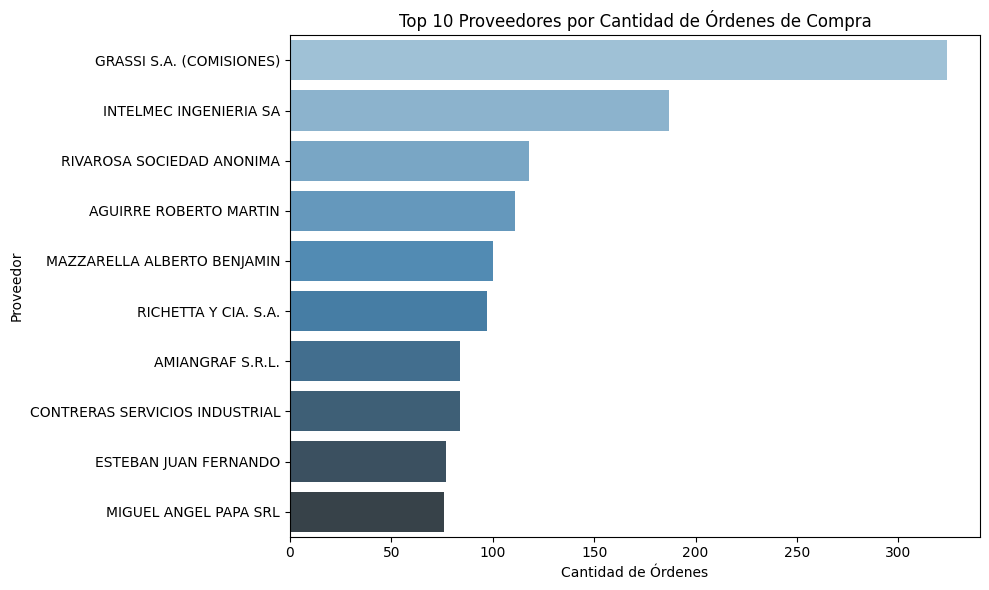

In [52]:
# Top 10 proveedores por cantidad de órdenes
top10 = df_grouped.head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='Cantidad_OC', y='RAZON_SOCIAL', palette='Blues_d')
plt.title('Top 10 Proveedores por Cantidad de Órdenes de Compra')
plt.xlabel('Cantidad de Órdenes')
plt.ylabel('Proveedor')
plt.tight_layout()
plt.show()

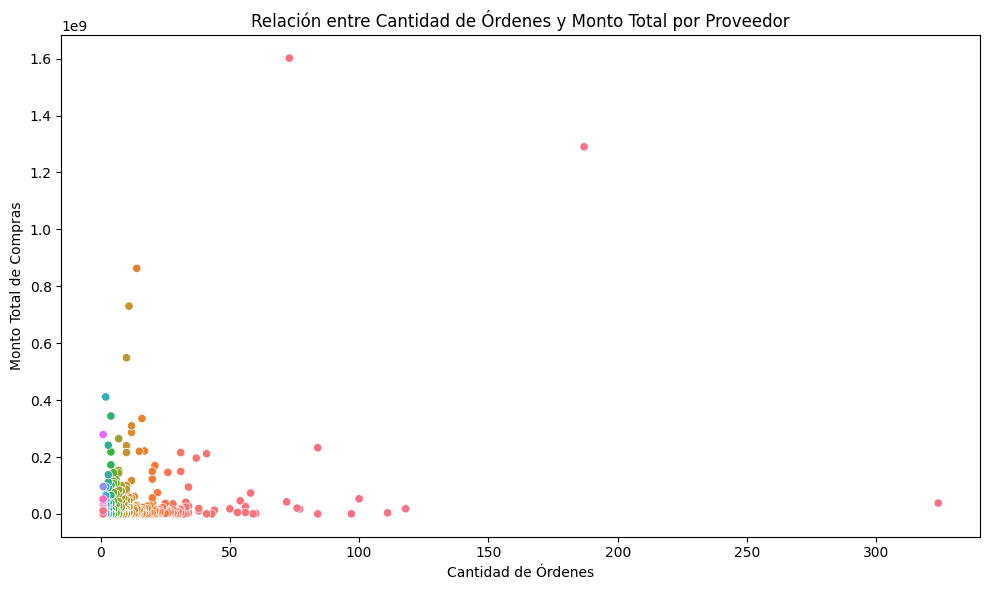

In [43]:
# Gráfico de dispersión con 3 variables
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_grouped, x='Cantidad_OC', y='Monto_Total', hue='RAZON_SOCIAL', legend=False)
plt.title('Relación entre Cantidad de Órdenes y Monto Total por Proveedor')
plt.xlabel('Cantidad de Órdenes')
plt.ylabel('Monto Total de Compras')
plt.tight_layout()
plt.show()

## Interpretación del gráfico
El gráfico de dispersión permite observar si los proveedores con más órdenes también concentran mayor volumen económico. Esto ayuda a identificar candidatos para acuerdos marco o contratos estratégicos.

In [44]:
# Detección de valores faltantes
faltantes = df.isnull().sum()
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)
faltantes

,0
OBSERVACIONES SC,16443
FECHA VALORIZACIÓN,10081
FECHA APROBACIÓN GERENCIAL,8861
FECHA APROBACIÓN TÉCNICA,8848
NÚMERO SC,8837
FECHA SC,8837
FECHA OBJETIVO SC,8837
ESTADO SC,8837
PROYECTO,3246
USUARIO_SOLICITANTE,2167


## Conclusión
Este análisis permitió identificar proveedores clave por volumen de órdenes y monto total. Además, se detectaron columnas con valores faltantes que podrían requerir limpieza o revisión en futuras etapas del proyecto.

ENTREGA FINAL

In [45]:
# Me quedo con las columnas que necesito para el modelo
columnas_modelo = ['RAZON_SOCIAL', 'RUBRO', 'CODIGO_ARTICULO', 'CANTIDAD_SOLICITADA', 'SUBTOTAL_POR_ITEM']

# Limpio los datos y elimino nulos
df_model = df[columnas_modelo].dropna()

# Codifico las variables categóricas
X = pd.get_dummies(df_model.drop(columns='SUBTOTAL_POR_ITEM'), drop_first=True)
y = df_model['SUBTOTAL_POR_ITEM']

# Aplico SelectKBest para reducir variables
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Armo nuevo dataframe con las variables elegidas
selected_features = X.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Muestro qué quedó seleccionado
print("Variables que mejor explican el subtotal por ítem:")
print(selected_features)


Variables que mejor explican el subtotal por ítem:
Index(['RAZON_SOCIAL_BUNGE ARGENTINA S A', 'RAZON_SOCIAL_CALERAS SAN JUAN SA',
       'RAZON_SOCIAL_ESTANCIAS DEL TOTORAL S A',
       'RAZON_SOCIAL_GIANFELICI FABIAN ESTEBAN',
       'RAZON_SOCIAL_HIJOS DE LINO FABBRONI SA',
       'RAZON_SOCIAL_LOS SEIS HERMANOS SRL', 'RAZON_SOCIAL_RETINTO SA',
       'RUBRO_CALDO/JUGO MANZANA', 'RUBRO_INSUMOS DESTIL.CEREAL',
       'RUBRO_VINAGRE A GRANEL'],
      dtype='object')


In [46]:

# ENTRENAMIENTO DEL MODELO DE REGRESIÓN

# Divido el dataset en entrenamiento (70%) y prueba (30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.3, random_state=42)

# Entreno un modelo de regresión lineal
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predigo sobre el set de prueba
y_pred = modelo.predict(X_test)


In [47]:

#  MÉTRICAS DE VALIDACIÓN DEL MODELO

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculo métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Muestro resultados
print(f"Error absoluto medio (MAE): {mae:,.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:,.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2%}")


Error absoluto medio (MAE): 1,250,595.19
Raíz del error cuadrático medio (RMSE): 5,475,552.37
Coeficiente de determinación (R²): 26.74%


CONCLUSIONES

En este trabajo desarrollé un modelo de regresión para predecir el subtotal por ítem en órdenes de compra, utilizando como variables el proveedor, el rubro, el artículo y la cantidad solicitada.

A partir del entrenamiento y evaluación del modelo, se obtuvieron los siguientes resultados:

Error absoluto medio (MAE): $1.250.595

Raíz del error cuadrático medio (RMSE): $5.475.552

Coeficiente de determinación (R²): 26,74%

Esto indica que el modelo logra explicar aproximadamente un 27% de la variabilidad del subtotal, lo cual es un resultado razonable considerando la diversidad de proveedores, rubros y artículos presentes en la base.

En términos prácticos, esta herramienta puede ser útil para:

Estimar el costo esperado de un ítem antes de lanzar una orden.

Detectar valores atípicos o posibles sobrecostos.

Apoyar decisiones estratégicas como negociaciones, acuerdos marco o simulaciones presupuestarias.

Como mejora futura, se podría avanzar en:

Probar modelos más potentes como Random Forest o Gradient Boosting.

Incluir variables adicionales como PRECIO_UNITARIO_NETO, MONEDA, o el tipo de cambio.

Limpiar valores extremos que podrían estar afectando el desempeño.

Este proyecto fue una buena oportunidad para aplicar técnicas de machine learning en un caso concreto de compras, algo directamente relacionado con mi experiencia profesional.